# Habitable Zone

宜居带是指恒星附近可以存在类地行星并且有液态水的区域。

我们尝试用 273-373K 的黑体温度来对太阳周围的宜居带进行半径估计。

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 20

Habitable Zone 的定义中，我们关心的变量是行星到恒星之间的距离 $R[A.U.]$ 随着行星表面温度 $T[K]$ 的关系。

我们假设恒星的光度为 $L[L_\odot]$, 其单位为太阳光度.

我们先来看一下一个太阳光度转换为我们常见的功率单位 $J/s$ 是多少

In [2]:
u.L_sun.in_units(u.J/u.s) # 可以用太阳常数验证一下

3.828e+26

Stefan-Boltzman 常数

In [3]:
c.sigma_sb

<<class 'astropy.constants.codata2018.CODATA2018'> name='Stefan-Boltzmann constant' value=5.6703744191844314e-08 uncertainty=0.0 unit='W / (m2 K4)' reference='CODATA 2018'>

## 行星接收的辐射功率

我们假设行星的半径为 $r[km]$，那么行星接收到的恒星辐射功率为

$P_{accept} = \dfrac{\pi r^2}{4 \pi R^2} L $ 

## 行星热辐射功率

$P_{thermal} = 4 \pi r^2 \cdot \sigma T^4$ 

## 如果行星达到平衡状态

$P_{accept} = P_{thermal}  $

可以得到 $R$ 和 $T$ 的问题:

$R(L, T) = \dfrac{1}{4 T^2} \sqrt{\dfrac{L}{\pi \sigma}}$

或

$T(L, R) = \left( \dfrac{L}{16 \pi \sigma R^2} \right) ^\frac{1}{4}$

In [4]:
def calculate_temperature(L: float = 1., R: float = 1.):
    T = np.power(L * u.L_sun / (16 * np.pi * c.sigma_sb * (R * u.astronomical_unit) ** 2),1/4)
    return T.to(u.Kelvin).value

def calculate_distance(L: float = 1., T: float = 278.):
    R = 1 / (4 * (T * u.K) ** 2) * np.sqrt(L * u.L_sun / np.pi / c.sigma_sb)
    return R.to(u.astronomical_unit).value

In [5]:
# 距离太阳1AU的温度
calculate_temperature(1., 1.)

278.3299094150219

In [6]:
# 太阳周围温度为278K的距离
calculate_distance(1., 278.)

1.0023748573440077

(0.0, 10.0)

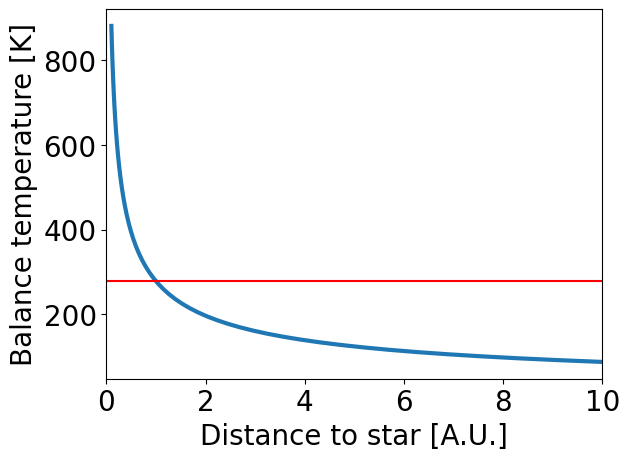

In [7]:
R = np.logspace(-1, 1)
T = calculate_temperature(L=1, R=R)
plt.plot(R, T, lw=3)
plt.xlabel("Distance to star [A.U.]")
plt.ylabel("Balance temperature [K]")
plt.hlines(278, 0, 10, colors="r")
plt.xlim(0, 10)

In [8]:
# 计算273-373K
R_max = calculate_distance(1, 273)
R_min = calculate_distance(1, 373)
print(R_min, R_max)

0.5568036748267745 1.0394281216033263
